In [1]:
import pandas as pd
import numpy as np
import pickle
from scipy.stats import pearsonr
import scipy as sp
import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.utils import resample
from random import sample
import random
import csv
import scipy
from sklearn import preprocessing
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import geopandas as gpd
from shapely.geometry import Polygon
from shapely.geometry import box
import matplotlib.patches as patches
import random
from shapely.geometry import Point
from copy import copy
from shapely.ops import unary_union
import seaborn as sns

In [2]:
#create df for each cluster
df = []
used_cluster = [1, 2, 3, 4, 5, 6, 7]
for cluster in used_cluster:
    df.append(pd.read_csv("cluster" + str(cluster) + ".csv"))

In [3]:
newdf = pd.concat(df)

In [5]:
newdf.shape

(528670, 25)

In [6]:
new = newdf[['pickup_hour', 'pickup_weekday', 'speed']].copy()
new

,pickup_hour,pickup_weekday,speed
0,0,6,15.988563
1,0,4,20.893035
2,0,0,48.789521
3,2,6,13.767401
4,1,3,21.636931
...,...,...,...
210155,22,5,13.597378
210156,18,1,12.175659
210157,19,5,27.485281
210158,14,2,16.862383


C:\Users\GI Maximus\anaconda3\envs\advance_ml\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


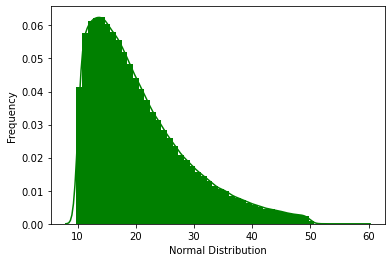

In [7]:
ax = sns.distplot(new['speed'],
                  bins=50,
                  kde=True,
                  color='green',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')
 
plt.show()

1.5077340457603465
9.767300217772348
7.256830767879534


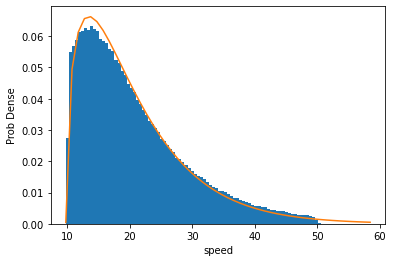

In [16]:
plt.hist(new['speed'], bins=100, density=True)
[a_fit, loc_fit, scale_fit]=scipy.stats.gamma.fit(new['speed'])
print(a_fit)
print(loc_fit)
print(scale_fit)
x = np.linspace(np.min(new['speed']), np.max(new['speed']))

plt.plot(x, scipy.stats.gamma.pdf(x, a_fit, loc=loc_fit, scale=scale_fit),)

plt.xlabel("speed")

plt.ylabel("Prob Dense")
plt.show()

In [19]:
k = len([a_fit, loc_fit, scale_fit])
logLik = np.sum(sp.stats.gamma.logpdf(new['speed'], [a_fit, loc_fit, scale_fit][0], loc=[a_fit, loc_fit, scale_fit][1], scale=[a_fit, loc_fit, scale_fit][2]) ) 
aic = 2*k - 2*(logLik)
aic

3743100.194003765

8.710602405736786
12.92638549316959


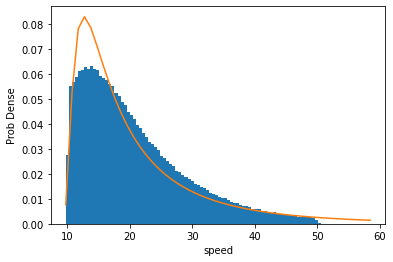

In [17]:
plt.hist(new['speed'], bins=100, density=True)
[loc_fit, scale_fit]=scipy.stats.wald.fit(new['speed'])
print(loc_fit)
print(scale_fit)
x = np.linspace(np.min(new['speed']), np.max(new['speed']))

plt.plot(x, scipy.stats.wald.pdf(x, loc=loc_fit, scale=scale_fit),)

plt.xlabel("speed")
plt.ylabel("Prob Dense")
plt.show()

In [20]:
k = len([loc_fit, scale_fit])
logLik = np.sum(sp.stats.wald.logpdf(new['speed'], loc=[loc_fit, scale_fit][0], scale=[loc_fit, scale_fit][1]) ) 
aic = 2*k - 2*(logLik)
aic


3589605.0271773944

In [23]:
r = sp.stats.wald.rvs(loc=[loc_fit, scale_fit][0], scale=[loc_fit, scale_fit][1],size=1000)
r

array([ 14.42637845,  13.44150099,  20.47853108,  14.94699625,
        12.54017623,  23.24023979,  18.79689495,  13.05503061,
        56.75931295,  11.36450101,  15.45652005,  11.07154303,
        15.60706562,  20.91292142,  18.98822607,  19.88974403,
        12.97833324,  16.71702337,  14.25517129,  27.60906139,
        18.97643802,  11.94810274,  22.27817276,  20.66048647,
        19.35294482,  29.36637463,  20.09630886,  34.57133103,
        10.40560276,  31.16706202,  32.30790874,  31.96347559,
        32.67209569,  15.82267028,  13.56375081,  35.84786707,
        19.47851956,  18.11760775,  35.40686009,  19.4296878 ,
        14.81494977,  16.72274761,  16.30934363,  16.70809894,
        12.63786298,  20.84007457,  17.11758449,  16.05646574,
        52.18785402,  24.91189504,  32.38612914,  11.52550956,
        12.76368113,  24.62406463,  16.17822407,  11.69666672,
        29.20541186,  18.07153156,  22.74954627,  29.46805902,
        20.34552476,  35.61549354,  21.97663526,  26.89

C:\Users\GI Maximus\anaconda3\envs\advance_ml\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


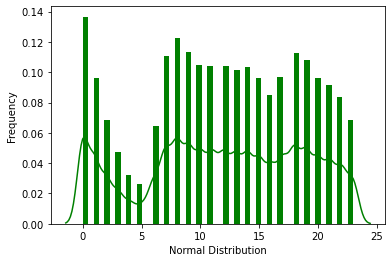

In [13]:
ax = sns.distplot(new['pickup_hour'],
                  bins=50,
                  kde=True,
                  color='green',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')
 
plt.show()

C:\Users\GI Maximus\anaconda3\envs\advance_ml\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


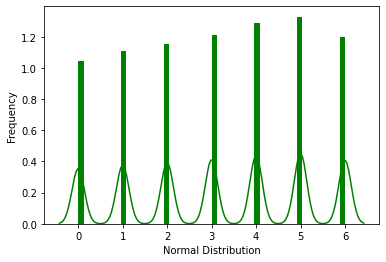

In [14]:
ax = sns.distplot(new['pickup_weekday'],
                  bins=50,
                  kde=True,
                  color='green',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')
 
plt.show()